<div align="right"><b>Parin Kittipongdaja<br>
Parin.kiti@gmail.com <br>
Problem 1 <br>
For Chulalongkorn AI Academy candidate screening </b></div>

# <center>Drug Allergy Prediction</center>


# Description

### Problem introduction
- All doctors want to avoid prescribing drugs that maybe allergic to the patients
- Enzyme-linked immunospot (ELISpot) is a laboratory technique that tests whether the patient's immune cells will respond to particular drugs. This allows doctor to screen whether a drug is likely to be safe for the patient.
- As with any test, ELISpot is not perfect. Drugs that the patient is allergic to sometimes do not elicit any response in ELISpot test (False Negative) and vice versa.
- Hence, we want to develop a prediction model for drug allergy based on patient information, drug information, and ELISpot result.

### The dataset
- Here, we have put together an anonymized dataset of ELISpot test results for ~800 patient and drug combinations.
- Ground truth drug allergy labels (last column) are available for only 14% of the dataset (115 patient and drug combinations). This is because the only way to obtain ground truth for drug allergy is to re-challenge the patients with the suspected drugs.
- There are also some missing feature values. This is because some information is not available for some patients.

### Data dict
- ELISpot_Control is the ELISpot test result for the POSITIVE CONTROL (i.e., we expect to see strong response)
- ELISpot_Result is the ELISpot test result for SUSPECTED DRUG (i.e., this is the result that indicate whether the patient would be allergic to that drug)
- NARANJO_Category is ORDINAL.
- Exposure_Time is the amount of times since the patient has taken the drug until the ELISpot test date
- Suspicion_Score is the suspicion level of the drug (1 = suspected drug, 2 = similar to suspected drug, 3 = negative control). This is ORDINAL.
- Allergic_Reaction_Group is the severity of patient's allergic reaction. This is ORDINAL.
- Drug_Group is CATEGORICAL.
- Drug_Rechallenge_Result is the ground truth of this dataset that we want to predict.

### The tasks
- Develop and present a prediction model for drug allergy.
- Address the issue of missing feature values in some way.
- Make use of data points with missing ground truth labels.

### Acknowledgements
- We would like to thank Assoc. Prof. Jettanong Klaewsongkram and Dr. Yuda Chongpison for collecting and sharing the dataset.

### License
- All information contained in this dataset is confidential and should not be shared outside of Chulalongkorn University's AI Academy staff and examinees.

### Source
- https://www.kaggle.com/dataset/164839c70ca43c870151479e85f496daa3b68be24a93c44fa1cd153c66049bf5

# Methods
This study consists of 8 processes. The details are described follows;

1. **Data acquisition**<br>
The collection of data in this study is retrieved from kaggle following this [Link](https://www.kaggle.com/dataset/164839c70ca43c870151479e85f496daa3b68be24a93c44fa1cd153c66049bf5) including an anonymized dataset of ELISpot test results for ~800 patient and drug combinations.


2. **Exploratory Data Analysis**<br>
The exploratory data analysis or “EDA” is a critical first step in analyzing the data from an experiment. Here are the main reasons we use EDA:
    - detection of mistakes and also missing value
    - checking of assumptions
    - preliminary selection of appropriate models
    - determining relationships among the explanatory variables, and
    - assessing the direction and rough size of relationships between explanatory and outcome variables.


3. **Data preparation and preprocessing.**<br>
    **3.1 Missing-data Imputation** <br>
In statistics, imputation is the process of replacing missing data with substituted values. In this study we will try to impute category data with machine learning classifier and continuous data with linear regression.<br>
    **3.2 Encoding Categorical Features**<br>
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.<br>
    **3.3 Handling Imbalanced Data**<br>
Imbalanced classes are a common problem in machine learning classification where there is a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas, including medical diagnosis, spam filtering, and fraud detection. In this study, due to we have a small dataset; thus, we will perform the oversampling technique for the minority class(Drug_Rechallenge_Result: Class 1.0).


4. **Transform Feature** <br>
After we get the list of selected feature, we have to eliminate feature value which is not relevant to outcome (e.g. PatientID). We will use this step to transform feature before we encode feature and split data to train and test.


5. **Split data**<br>
For developing machine learning classifier, we will split data into two sets, which are training set and testing set with balancing class. The new model is developed on the training set and test it on the holdout set.


6. **Developing model and Fine-tuning hyperparameter**<br>
In this study, we will develop a model from Logistic Classifier and Naive Bayes classifier. The model hyperparameters are tuned by using grid-search based on accuracy to get the best parameter.
 

7. **Semi-supervised learning: Pseudo-labeling**<br>
Due to we have many data with unlabeled which is useless for supervised learning. However, we can even use it to help train our model with semi-supervised learning – combining both unlabeled and labeled data for model training. In this technique, instead of manually labeling the unlabelled data, we give approximate labels on the basis of the labelled data. 

8. **Evaluation**<br>
After the model is built, we will evaluates it with test set by using <u>Sensitivity(Recall)</u>  and other metrics such as AUC, Specifivity, and Precision to estimate the performance. The model with the highest performance is chosen.



# <u><center> Let's conduct the experiment </center></u>
    

<a id="ch0"></a>
# Table of Contents
1. [Chapter 1 - Install Neccessary Library](#ch1)
1. [Chapter 2 - Check Version of Library](#ch2)
1. [Chapter 3 - Importing Required Libraries](#ch3)
1. [Chapter 4 - Step 1: Define Function](#ch4)
1. [Chapter 5 - Step 2: Importing Dataset](#ch5)
1. [Chapter 6 - Step 3: Data Exploration](#ch6)
1. [Chapter 7 - Step 4: Data preparation and preprocessig](#ch7)
1. [Chapter 8 - Step 5: Developing model, Fine-tuning hyperparameters and Pseudo-labeling](#ch8)
1. [Chapter 9 - Step 6: Evaluate Model Performance](#ch9)
1. [Chapter 10 - Result](#ch10)
1. [Chapter 11 - Analysis of Classification Error](#ch11)
1. [Chapter 12 - Conclusions, Limitations, and Discussion](#ch12)
1. [Chapter 13 - Future Direction](#ch13)
1. [Reference](#ch90)

<a id="ch1"></a>
# Install Neccessary Library
[Top](#ch0)

- Install a pip package in the current Jupyter kernel
```Python
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install -r requirements.txt
```

<a id="ch2"></a>
# Check Version of Library
[Top](#ch0)

In [1]:
import sys
import numpy as np
import matplotlib
import seaborn as sns
import tqdm
import sklearn
import pandas
import scipy


print ( "Python", sys.version )
print ( "Numpy", np.__version__ )
print ( "Matplotlib", matplotlib.__version__ )
print ( "Seaborn", sns.__version__ )
print ( "tqdm", tqdm.__version__ )
print ( "scikit-learn", sklearn.__version__ )
print ( "pandas", pandas.__version__ )
print ( "scipy", scipy.__version__ )


Python 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy 1.17.3
Matplotlib 3.0.3
Seaborn 0.9.0
tqdm 4.40.0
scikit-learn 0.22.1
pandas 0.25.3
scipy 1.4.1


<a id="ch3"></a>
# Importing Required Libraries
[Top](#ch0)

In [76]:
# Basic library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
import pickle

# Feature Selection
from scipy.stats import chi2_contingency

# Data preprocessing
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Display and Parameter Setting

In [3]:
# Set dataframe display
pd.set_option('display.max_columns', None)  # default = 20
pd.set_option('display.expand_frame_repr', False) # default = True
pd.set_option('display.max_colwidth', -1) # default = 50
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="ch4"></a>
# 1. Define function
[Top](#ch0)

In [63]:
# Countplot Visualization
def percent_countplot(df, col_name, col_hue = None, order_by_value = False, topn = 0, dropna = True,
                      orient = 'v', annot_percent = True, figsize = (14,8)):
    
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Fill Paramter
    fs = 16 # Font size
    x_data = df.copy()
    x_col = col_name # column to count
    x_hue = col_hue # For divide column
    tittle = 'Distribution by '+x_col

    matplotlib.rc('xtick', labelsize = fs-2)     
    matplotlib.rc('ytick', labelsize = fs-2)
    fig = plt.figure(figsize= figsize)
    
    data_col = x_data   
        
    # topn > 0 we will combine the rest as "Other"
    if topn:
        counts = data_col[x_col].value_counts()
        topn_name = counts.nlargest(topn).index
        data_col[x_col] = data_col[x_col].where(data_col[x_col].isin(topn_name), other = 'Other')
    elif topn == 0:
        topn = data_col[x_col].nunique()
        
    # arrange order by value or index?
    if order_by_value :
        counts = data_col[x_col].value_counts()
        max_count = max(counts) # for adjust text alignment
    else:
        if str in list(map(type,data_col[x_col])) or not dropna:
            data_col[x_col] = data_col[x_col].astype(str)
        counts = data_col[x_col].value_counts().sort_index()
        max_count = max(counts.iloc[:topn]) # for adjust text alignment
        
    if orient == 'v':
        ax = sns.countplot(x = x_col, hue = x_hue, data= data_col, order = counts.iloc[:topn+1].index)
        ax.set_xlabel(x_col, color = 'r', fontsize = fs, fontweight='bold')
        ax.set_ylabel('Frequency', color = 'b', fontsize = fs, fontweight='bold')
        # Set rotation of xticks if name is too long
        data_col[x_col] = data_col[x_col].astype(str)
        xrot = 15 if max(list(map(len,data_col[x_col].unique()))) > 10 else 0
        ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    elif orient == 'h':
        ax = sns.countplot(y = x_col, hue = x_hue, data= data_col, order = counts.iloc[:topn+1].index)
        ax.set_ylabel(x_col, color = 'b', fontsize = fs, fontweight='bold')
        ax.set_xlabel('Frequency', color = 'r', fontsize = fs, fontweight='bold')
        xrot = 0
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
        
    total_count = sum(counts) # for calculate percentage
    # print(counts)
    
    # fig.suptitle('test title', fontsize=12)
    ax.set_title(tittle, fontsize = fs, fontweight='bold' )

    plt.xticks(rotation=xrot, color='r', size=16)
    plt.yticks(rotation=0, color='b', size=16)
    
    if x_hue == None and orient == 'v':
        for i, v in enumerate(counts[:topn+1]):
            ax.text(x = i, y=v + max_count*0.01 , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
            if annot_percent:
                ax.text(x = i, y= v/2, s=str('{:.2f}'.format(v*100/total_count))+'%',
                        color='yellow', fontweight='bold', size = 14,
                        horizontalalignment='center', 
                        verticalalignment='center' 
                        )
    elif x_hue == None and orient == 'h':
        for i, v in enumerate(counts[:topn+1]):
            ax.text(x = v + max_count*0.03, y=i , s='{:,}'.format(v), horizontalalignment='center', color='black', fontweight='bold')
            if annot_percent:
                ax.text(x = v/2, y=i , s=str('{:.2f}'.format(v*100/total_count))+'%',
                        color='yellow', fontweight='bold', size = 14,
                        horizontalalignment='center', 
                        verticalalignment='center' 
                        )
    return ax

def chi2_indtest(df_feature, df_target, pvalue = 0.05, verbose =0):
    import pandas as pd
    from scipy.stats import chi2_contingency
    
    feature_list_chi = []
    feature_list_chi_score = []
    for series in df_feature:
        nl = "\n"

        crosstab = pd.crosstab(df_feature[series], df_target.values.ravel())
        if verbose: print(crosstab, nl)
        chi2, p, dof, expected = chi2_contingency(crosstab)
        if verbose: print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")
        if p < pvalue:
            feature_list_chi.append(series)
            feature_list_chi_score.append(chi2)
    return feature_list_chi, feature_list_chi_score

def plot_feature_importances(df, threshold = 0.90, normalized = True):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index(drop=True)
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    colors = ['b', 'g', 'r', 'c', 'm', 'y','#4ef7ae','#d96d09', '#2b9900','#f7184d', '#1b5c44','#f25e60','#e59400']

    if normalized:
        ax.barh(list(reversed(list(df.index[:15]))), 
                df['importance_normalized'].head(15), 
                align = 'center', edgecolor = 'k',color = colors)
        plt.xlabel('Normalized Importance')
    else:
        ax.barh(list(reversed(list(df.index[:15]))), 
                df['importance'].head(15), 
                align = 'center', edgecolor = 'k',color = colors)
        plt.xlabel('Importance')
        # Set the xticks format
        ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(int(x))))
        
#     for i, v in enumerate(df['importance_normalized'].head(15)):
#         ax.text(v + 0.001, i , '{:.4f}'.format(v), color='blue', fontweight='bold')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    
    
    # Plot labeling
    plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    n_fea = len(df)
    ax.plot(np.arange(n_fea)+1, df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    
    if threshold:
        # Index of minimum number of features needed for cumulative importance threshold
        # np.where returns the index so need to add 1 to have correct number
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        plt.vlines(x = importance_index + 1, ymin = 0, ymax = threshold, 
                   linestyles='--', colors = 'blue' )
        plt.text(importance_index +0.02*n_fea, 0, str(importance_index + 1), color='red', fontweight='bold')
        plt.text(importance_index +0.05*n_fea, threshold, str(threshold*100)+'%', color='orange', fontweight='bold')
        plt.show();

    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

    
    return df


# Before we use 'get_dummies' function we have to convert data type of all feature to be 'category' 
def cvt_type(df, col_list, dtype = 'category'):
    for col in col_list:
        df[col] = df[col].astype(int).astype('category')
    return df

# Oversampling
def makeOverSamplesADASYN(X,y):
    from imblearn.over_sampling import ADASYN
    """
    Purpose
    ----------
    Increasing the observation of minority class 

    Parameters
    ----------
    X: Independent Variable in DataFrame
    y: Dependent Variable in Pandas DataFrame format
    Returns:
    ----------
    Returns Independent and Dependent variable with resampling minority class
    """
    X_resampled, y_resampled = ADASYN(random_state=7).fit_sample(X, y)
    return(X_resampled, y_resampled)


# Logistic Regression
def LogReg_HPTune(X, y, verbose = 0):
    """
    Purpose
    ----------
    Choosing a set of optimal hyperparameters for a Logistic Regression Classifier

    Parameters
    ----------
    X: Data set with all feature or predictor
    y: Data set with Class
    verbose: 0 mean not show summary of tuning
             1 mean show summary of tuning
    Returns:
    ----------
    Returns grid search model of Logistic Regression Classifier with tuned hyperparameter
    """  
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    
    # Logistic Regression Classifier
    LogReg_clf = LogisticRegression(random_state = 7, fit_intercept=False)
    
    # Create regularization hyperparameter space
    C = np.logspace(-5, 5, 100)
    
    # Create regularization penalty space
    penalty = ['none', 'l2']
    
    # Create class weight mode space
    class_weight = [None, 'balanced']
    
    # Create solver function space
    solver = ['saga', 'lbfgs', 'newton-cg']

    
    # Define Search Param
    param_dist = dict(C = C,
                      penalty = penalty,
                      class_weight = class_weight,
#                       solver = solver
                     )
    rs = RandomizedSearchCV(estimator=LogReg_clf,
                            param_distributions=param_dist,
                            refit=True,
                            scoring=score_param,
                            n_iter=n_iter_search,
                            cv=cv,
                            n_jobs=-1,
                            verbose =1,
                            random_state=7,
                            iid=True)
    if verbose == 1:
        start = time()    
        rs.fit(X,y)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." 
              % (time() - start, len(rs.cv_results_['params'])))

    elif verbose == 0:
        rs.fit(X,y)
    
    # Best parameter from RandomizedSearchCV
    bs_C = rs.best_params_['C'] 
    bs_penalty = rs.best_params_['penalty'] 
    bs_class_weight = rs.best_params_['class_weight']
#     bs_solver = rs.best_params_['solver'] 
    d_C = np.log10(bs_C)
    
    param_grid = dict(C = np.append(bs_C,np.logspace(d_C-2,d_C+2,num=100)),
                      penalty = [bs_penalty],
                      class_weight = [bs_class_weight],
#                       solver = [bs_solver]
                     )
    gs = GridSearchCV(estimator=LogReg_clf, 
                      param_grid=param_grid,
                      refit=True,
                      scoring=score_param,
                      cv=cv,
                      n_jobs=-1,
                      verbose =1,
                      iid=True)
    
    if verbose == 1:
        start = time()
        gs.fit(X,y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))

    elif verbose == 0:
        gs.fit(X,y)
    
    return rs, gs


# Logistic Regression with ovesampling
def LogReg_HPTune_w_OverSam(X, y, verbose = 0):
    """
    Purpose
    ----------
    Choosing a set of optimal hyperparameters for a Logistic Regression Classifier with balancing data

    Parameters
    ----------
    X: Data set with all feature or predictor
    y: Data set with Class
    verbose: 0 mean not show summary of tuning
             1 mean show summary of tuning
    Returns:
    ----------
    Returns grid search model of Logistic Regression Classifier with tuned hyperparameter
    """  
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    
    # Oversampling
    X, y = makeOverSamplesADASYN(X,y)
    
    # Logistic Regression Classifier
    LogReg_clf = LogisticRegression(random_state = 7, max_iter=1000, fit_intercept=False)
    
    # Create regularization hyperparameter space
    C = [0.1,1,10] #np.logspace(-1, 1, 50)
    
    # Create regularization penalty space
    penalty = ['none', 'l2']
    
    # Create class weight mode space
    class_weight = [None, 'balanced']
    
    # Create solver function space
    solver = ['saga', 'lbfgs', 'newton-cg']
    
    # 
    fit_intercept = [True, False]

    
    # Define Search Param
    param_dist = dict(C = C,
#                       penalty = penalty,
#                       class_weight = class_weight,
#                       solver = solver,
#                       fit_intercept = fit_intercept,
                     )
    rs = RandomizedSearchCV(estimator=LogReg_clf,
                            param_distributions=param_dist,
                            refit=True,
                            scoring=score_param,
                            n_iter=n_iter_search,
                            cv=cv,
                            n_jobs=-1,
                            verbose =verbose,
                            random_state=7,
                            iid=True)
    if verbose == 1:
        start = time()    
        rs.fit(X,y)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." 
              % (time() - start, len(rs.cv_results_['params'])))

    elif verbose == 0:
        rs.fit(X,y)
    
    # Best parameter from RandomizedSearchCV
    bs_C = rs.best_params_['C'] 
#     bs_penalty = rs.best_params_['penalty'] 
#     bs_class_weight = rs.best_params_['class_weight']
#     bs_solver = rs.best_params_['solver'] 
#     bs_fit_intercept = rs.best_params_['fit_intercept']
    d_C = np.log10(bs_C)
    
    param_grid = dict(C = np.append(bs_C,np.logspace(d_C-1,d_C+1,num=50)),
#                       penalty = [bs_penalty],
#                       class_weight = [bs_class_weight],
#                       solver = [bs_solver],
#                       fit_intercept = [bs_fit_intercept],
                     )
    gs = GridSearchCV(estimator=LogReg_clf, 
                      param_grid=param_grid,
                      refit=True,
                      scoring=score_param,
                      cv=cv,
                      n_jobs=-1,
                      verbose =verbose,
                      iid=True)
    
    if verbose == 1:
        start = time()
        gs.fit(X,y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))

    elif verbose == 0:
        gs.fit(X,y)
    
    return rs, gs

# Naive Bayes
def NB_HPTune_w_OverSam(X, y, verbose = 0):
    """
    Purpose
    ----------
    Choosing a set of optimal hyperparameters for a Naive Bayes Classifier 

    Parameters
    ----------
    X: Data set with all feature or predictor
    y: Data set with Class
    verbose: 0 mean not show summary of tuning
             1 mean show summary of tuning
    Returns:
    ----------
    Returns grid search model of Naive Bayes Classifier with tuned hyperparameter
    """  
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    
    # Oversampling
    X, y = makeOverSamplesADASYN(X,y)
    
    gnb = GaussianNB(priors=None)
    param_dist = dict(var_smoothing = np.logspace(-16,0,200) ) # default is 1e-9
    rs = RandomizedSearchCV(estimator=gnb,
                             param_distributions=param_dist,
                             scoring=score_param,
                             refit=True,
                             n_iter = n_iter_search,
                             cv=cv,
                             n_jobs=-1,
                             random_state=7,
                             iid=True)
    if verbose == 1:
        start = time()    
        rs.fit(X, y)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." 
              % (time() - start, len(rs.cv_results_['params'])))
    elif verbose == 0:
        rs.fit(X, y)
    
    # Best parameter from RandomizedSearchCV
    bs_var_sm = rs.best_params_['var_smoothing']
    bs_var_sm_pw = np.log10(bs_var_sm)
    
    param_grid = dict(var_smoothing = np.logspace(bs_var_sm_pw*0.9,bs_var_sm_pw*1.1,50))
    gs = GridSearchCV(estimator=gnb, 
                      param_grid=param_grid,
                      scoring=score_param,
                      refit=True,
                      cv=cv,
                      n_jobs=-1, 
                      iid=True)
    
    if verbose == 1:
        start = time()
        gs.fit(X, y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))
    elif verbose == 0:
        gs.fit(X, y)
    
    return rs, gs

# Semi-supervised learning: Pseudo-labeling
def Pseudo_labeling(df_train, df_NaN, LogReg_HPTune_w_OverSam, n_sam = 100, verbose=0):
    
    print("Initiate base model from training set....")
    # Training set
    X_encoded = df_train.drop(['Drug_Rechallenge_Result','Patient_ID'], axis=1)
    y_data = df_train[['Drug_Rechallenge_Result']]
    
    print(X_encoded.shape)
    print(y_data.shape)
    
    LogReg_rs, LogReg_gs = LogReg_HPTune_w_OverSam(X_encoded,y_data.values.ravel(), verbose=0)
    
    # Make a copy of df_NaN
    df_NaN_temp = df_NaN.copy()
    
    n_sam = n_sam
    n_min = n_sam
    n_frac = n_sam
    if type(n_sam) != int:
        n_sam = n_frac * len(y_data)
        n_min = 100
    n_round = 0
    
    print("Start Pseudo-labeling Process")
    
    while len(df_NaN_temp) > n_min and len(df_NaN_temp) > n_sam:
        n_round += 1
        print("Round: ", n_round, "\nProcessing....")
        
        # Sampling n_sam sample to predict class and store idx with high confidence
        df_NaN_train = df_NaN_temp.sample(n = int(n_sam), random_state=7)
        df_NaN_temp = df_NaN_temp.drop(df_NaN_train.index)
        
        X_encoded_NaN = df_NaN_train.drop(['Drug_Rechallenge_Result','Patient_ID'], axis=1)
#         y_data_NaN = df_NaN_train[['Drug_Rechallenge_Result']]

        # Search idx with high predict_proba
        high_confidence_idx = []
        predict_result = []
        threshold_pos = 0.8
        for idx in X_encoded_NaN.index:
            Pos_confidence = LogReg_gs.predict_proba(X_encoded_NaN.loc[[idx]])[:,1]
            if Pos_confidence > threshold_pos:
                high_confidence_idx.append(idx)
                predict_class = LogReg_gs.predict(X_encoded_NaN.loc[[idx]])
                predict_result.append(predict_class)
            elif Pos_confidence < (1-threshold_pos):
                high_confidence_idx.append(idx)
                predict_class = LogReg_gs.predict(X_encoded_NaN.loc[[idx]])
                predict_result.append(predict_class)

        # Create dataframe to store high confidence result
        df_feature_NaN = X_encoded_NaN.loc[high_confidence_idx]
        df_predict_NaN = pd.DataFrame(predict_result, columns=['Drug_Rechallenge_Result'], index=high_confidence_idx)

        # Concat new predicted data to X_encoded and y_data
        X_encoded = pd.concat([X_encoded,df_feature_NaN])
        y_data = pd.concat([y_data,df_predict_NaN])
        
        print(X_encoded.shape)
        print(y_data.shape)

        # GridSearch CV - Retraining
        score_param = 'accuracy' # Score for tune model
        n_iter_search = 100 # Max candidate parameter for RandomizedSearchCV
        cv = 5 # Number of k-fold cross validation
        LogReg_rs, LogReg_gs = LogReg_HPTune_w_OverSam(X_encoded,y_data.values.ravel(), verbose=0)

        # Append row which has low confident to df_NaN_temp
        low_con_idx = df_NaN_train[~df_NaN_train.index.isin(high_confidence_idx)].index
        df_NaN_temp = pd.concat([df_NaN_temp,df_NaN_train.loc[low_con_idx]])
        
        # Display performance of each round
        print('Training score: ', LogReg_rs.best_score_)
        print('Test score: ', accuracy_score(LogReg_rs.predict(X_encoded_test),y_data_test))
        
        # Re-calculate n_sam
        if type(n_frac) != int:
            n_sam = n_frac * len(y_data)
        
    # If the rest NaN sample less than n_sam
    df_NaN_train = df_NaN_temp
    X_encoded_NaN = df_NaN_train.drop(['Drug_Rechallenge_Result','Patient_ID'], axis=1)
    predict_class = LogReg_gs.predict(X_encoded_NaN)
    df_predict_NaN = pd.DataFrame(predict_class, columns=['Drug_Rechallenge_Result'], index=X_encoded_NaN.index)
    
    # Concat new predicted data to X_encoded and y_data
    X_encoded = pd.concat([X_encoded,X_encoded_NaN])
    y_data = pd.concat([y_data,df_predict_NaN])   
    
    print("=========== Finish ===========")
    print(X_encoded.shape)
    print(y_data.shape)
    
    return X_encoded, y_data, LogReg_gs


# Make a model summary report
def model_report(Feature_data,Target_data,model_name_List,model_func, best_param_clf =None):
    
    import sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score, roc_auc_score
    from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,balanced_accuracy_score

    model_list = []
    accuracy_list = []
    balanced_acc_list = []
    auc_list = []
    cm_list = []
    cm_nor_list = []
    recall_list = []
    precision_list = []
    precision_neg_list = []
    specificity_list = []
    ap_list = []
    f1_list = []
    best_params_list = []
    
    for i,(name, model, X_test, y_test) in enumerate(zip(model_name_List, model_func, Feature_data, Target_data)):
        
        if isinstance(model, 
                      (sklearn.model_selection._search.RandomizedSearchCV,
                       sklearn.model_selection.GridSearchCV)):            
            y_pred = model.best_estimator_.predict(X_test)
            P_true = model.predict_proba(X_test)[:, 1]
            best_params = model.best_params_
            best_params_list.append(best_params)
        else:
            y_pred = model.predict(X_test)
            P_true = model.predict_proba(X_test)[:, 1]
            best_param = dict( C = model.get_params(deep=False)['estimator'].C, 
                                  class_weight = model.get_params(deep=False)['estimator'].class_weight
                                 )
            best_params_list.append(best_param)
             
        model_name = name
        TP, FN, FP, TN = confusion_matrix(y_test, y_pred, labels=[1, 0]).ravel()
        n_data = TP+FN+FP+TN
        
        
        Accuracy = round(accuracy_score(y_test, y_pred), 2)
        bal_acc = round(balanced_accuracy_score(y_test, y_pred),2)
        auc = round(roc_auc_score(y_test, P_true), 2)
        cm = dict(TP=TP, FP=FP, FN=FN, TN=TN)
        cm_nor = dict(TP=f'{TP/n_data:.2f}', FP=f'{FP/n_data:.2f}', FN=f'{FN/n_data:.2f}', TN=f'{TN/n_data:.2f}')
        Recall = round(recall_score(y_test, y_pred, average='binary'), 2)
        Precision = round(precision_score(y_test, y_pred, average='binary'), 2)
        Precision_neg = round(precision_score(y_test, y_pred, pos_label = 0, average='binary'), 2)
        Specificity = round(TN/float(TN+FP), 2)
        ap = round(average_precision_score(y_test, P_true, pos_label=1), 2)
        F1_score = round(f1_score(y_test, y_pred,average='binary'), 2)
        
        
        model_list.append(model_name)
        accuracy_list.append(Accuracy)
        balanced_acc_list.append(bal_acc)
        auc_list.append(auc)
        cm_list.append(cm)
        cm_nor_list.append(cm_nor)
        recall_list.append(Recall)
        precision_list.append(Precision)
        precision_neg_list.append(Precision_neg)
        specificity_list.append(Specificity)
        ap_list.append(ap)
        f1_list.append(F1_score)
        
        

    report = dict(LogReg_Model = model_list,
                  Accuracy = accuracy_list,
                  Balanced_Accuracy = balanced_acc_list,
                  AUC = auc_list,
                  Confusion_Matrix = cm_list,
                  Confusion_Matrix_Normalized = cm_nor_list,
                  Recall = recall_list,
                  Precision = precision_list,
                  Precision_neg = precision_neg_list,
                  Specificity = specificity_list,
                  Average_Precision = ap_list,
                  F1_score = f1_list,
                  Best_Parameters = best_params_list 
                 )
    
    df_report = pd.DataFrame.from_dict(report)
    pd.set_option('display.max_colwidth', -1)
    
    return df_report

def print_score(clf, X, y, cv=0):
    
    y_pred = clf.predict(X)
    acc_score = accuracy_score(y, y_pred)
    clf_report = classification_report(y, y_pred)
#     conf_matrix = confusion_matrix(y, y_pred)
    TP, FN, FP, TN = confusion_matrix(y, y_pred, labels=[1, 0]).ravel()
    n_data = TP+FN+FP+TN
    cm = dict(TP=TP, FP=FP, FN=FN, TN=TN)
    cm_nor = dict(TP=f'{TP/n_data:.2f}', FP=f'{FP/n_data:.2f}', FN=f'{FN/n_data:.2f}', TN=f'{TN/n_data:.2f}')
                 
    print(f"Results:\n")
    print(f"accuracy score: {acc_score:.4f}\n")
    print(f"Classification Report: \n {clf_report}\n")
    print(f"Confusion Matrix: \n {cm}\n")
    print(f"Confusion Matrix Normalized: \n {cm_nor}\n")

    if cv > 1:
        res = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
        print(f"Average Accuracy: \t {np.mean(res):.4f}")
        print(f"Accuracy SD: \t\t {np.std(res):.4f}")
        

<a id="ch5"></a>
# 2. Importing Dataset
[Top](#ch0)

In [5]:
df = pd.read_csv('DrugAllergyKaggle_v3_050720.csv')
df = df.sort_values(by = 'Patient_ID').reset_index(drop=True); df.head()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
0,2,1,26,2504,0.000,nan,nan,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,nan
1,7,0,75,1868,51.000,5.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4,1.000
2,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,nan
3,13,0,81,1617,10.000,nan,nan,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,nan
4,18,1,60,3136,0.000,nan,nan,nan,0,0.000,0,0,1.000,1.000,3,8.000,1,nan


In [6]:
df.describe(include='all')

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Score,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
count,799.000,799.000,799.000,799.000,798.000,431.000,509.000,622.000,799.000,781.000,799.000,799.000,785.000,798.000,799.000,771.000,799.000,114.000
mean,375.078,0.566,51.013,1698.603,11.974,3.237,1.198,428.534,0.354,0.070,0.100,0.123,0.187,0.326,2.081,4.014,3.826,0.246
std,144.888,0.496,22.345,879.909,51.111,1.797,0.519,3922.749,0.479,0.256,0.300,0.328,0.390,0.469,0.381,2.314,2.514,0.432
min,2.000,0.000,0.000,60.000,0.000,-3.000,0.000,-9.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000
25%,318.000,0.000,36.000,1120.000,0.000,2.000,1.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000,1.000,0.000
50%,403.000,1.000,53.000,1592.000,0.000,3.000,1.000,10.500,0.000,0.000,0.000,0.000,0.000,0.000,2.000,4.000,3.000,0.000
75%,486.000,1.000,70.000,2166.000,0.000,4.000,1.000,21.000,1.000,0.000,0.000,0.000,0.000,1.000,2.000,6.000,7.000,0.000
max,570.000,1.000,97.000,5290.000,554.000,9.000,3.000,43281.000,1.000,1.000,1.000,1.000,1.000,1.000,3.000,8.000,8.000,1.000


<a id="ch6"></a>
# 3. Data Exploration
[Top](#ch0)

In [7]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
n_uniq = df.nunique()
print ("\nUnique values :  \n",n_uniq)
print ("\nTotal Unique values :  {:,}".format(n_uniq.values.sum()))

Rows     :  799
Columns  :  18

Features : 
 ['Patient_ID', 'Gender', 'Age_Year', 'ELISpot_Control', 'ELISpot_Result', 'Naranjo_Score', 'Naranjo_Category', 'Exposure_Time', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group', 'Drug_Rechallenge_Result']

Missing values :   1582

Unique values :  
 Patient_ID                 298
Gender                     2  
Age_Year                   94 
ELISpot_Control            261
ELISpot_Result             77 
Naranjo_Score              13 
Naranjo_Category           4  
Exposure_Time              77 
Steroid_Usage              2  
Underlying_Condition_A     2  
Underlying_Condition_B     2  
Underlying_Condition_C     2  
Underlying_Condition_D     2  
Underlying_Condition_E     2  
Suspicion_Score            3  
Allergic_Reaction_Group    8  
Drug_Group                 8  
Drug_Rechallenge_Resu

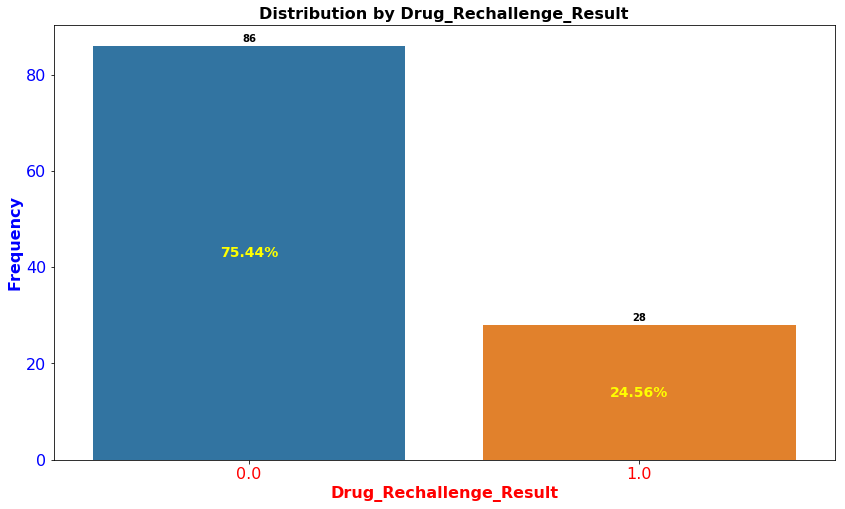

In [8]:
# See class distribution
percent_countplot(df, col_name='Drug_Rechallenge_Result',topn=0, dropna=True)

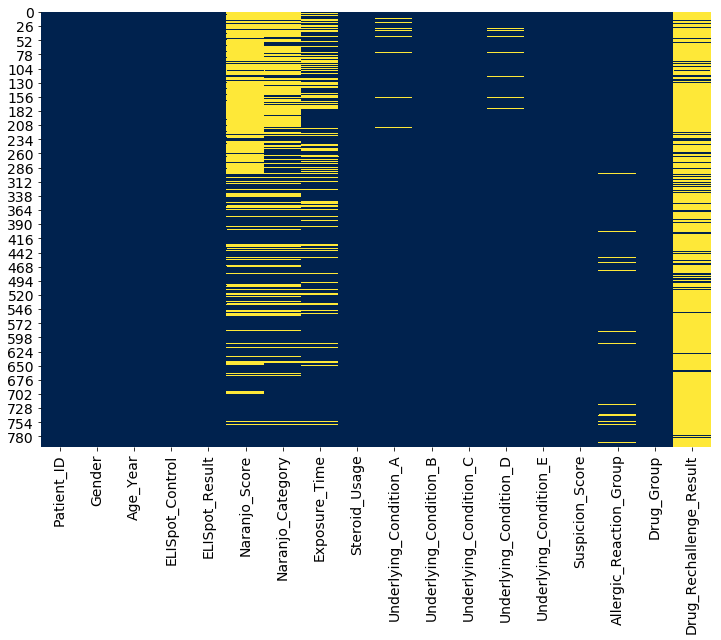

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

> There are so many missing value with 'Naranjo_Score', 'Naranjo_Category', 'Exposure_Time', and 'Drug_Rechallenge_Result' columns. 

####  Univariate analysis 

| Feature(X)\Response(y) | Continuous            | Categorical |   |
|------------------------|-----------------------|-------------|---|
| **Continuous**         | Pearson's Correlation | LDA         |   |
| **Categorical**        | ANOVA                 | Chi-Square  |   |

**Pearson’s correlation coefficient** is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship. A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related.

**Chi-Square Test:** In general term, this method is used to test the independence of two events. If a dataset is given for two events, we can get the observed count and the expected count and this test measures how much both the counts are derivate from each other.


<center> $H_{0}$: Two categorical variables are independent. <br>
    [or The proportions of interested event between two independent groups are not different.]<br>
$H_{a}$: Twocategorical variables are dependent or associated. </center>



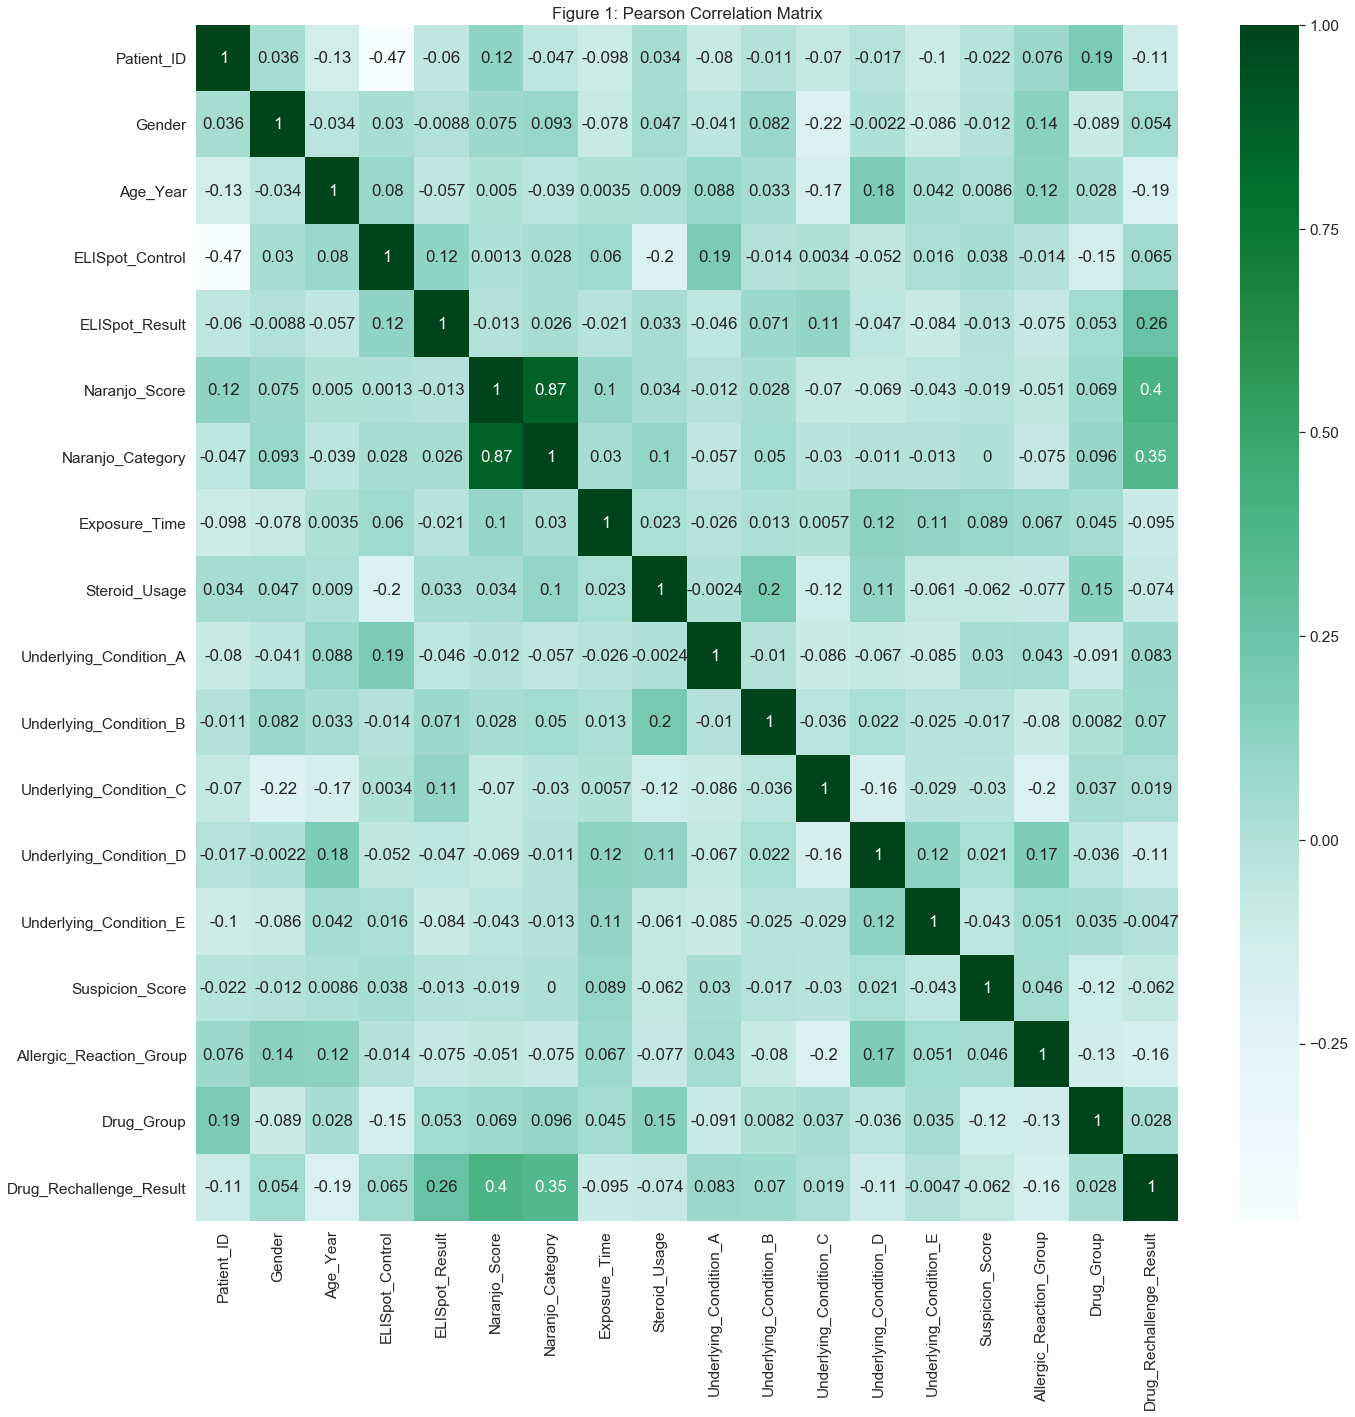

In [10]:
# Pearson’s correlation coefficient
plt.figure(figsize=(22,22)) 
sns.set(font_scale=1.4)
plt.title('Figure 1: Pearson Correlation Matrix')
sns.heatmap(df.corr(), annot=True, cmap='BuGn')

> The the Naranjo_Score and Naranjo_Category have highest Pearson Correlation to target variable (Drug_Rechallenge_Result). And also between Naranjo_Score and Naranjo_Category themself have a very high Pearson Correlation. Therefore, we might remove one of them to prevent the colinearity issue.

> Although, the Pearson Correlation can see the relationship between continuous data, however, in our study the target variable is category data as well as many features. Then we should look at the Chi-Square Test to see the relation or dependency instead.

In [11]:
# Chi-Square Test
category_feature = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
target = ['Drug_Rechallenge_Result']
pvalue = 0.05 
feature_list_chi, feature_list_chi_score = chi2_indtest(df[category_feature],df[target], pvalue = pvalue)

print('Select only IMPORTANT feature which p-value less than', pvalue)
print('Number of IMPORTANT feature for Prediction:', len(feature_list_chi), '\n',feature_list_chi)

Select only IMPORTANT feature which p-value less than 0.05
Number of IMPORTANT feature for Prediction: 2 
 ['Naranjo_Category', 'Allergic_Reaction_Group']


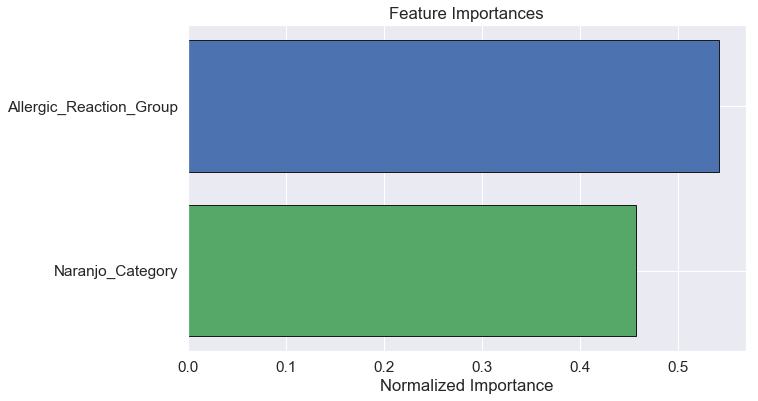

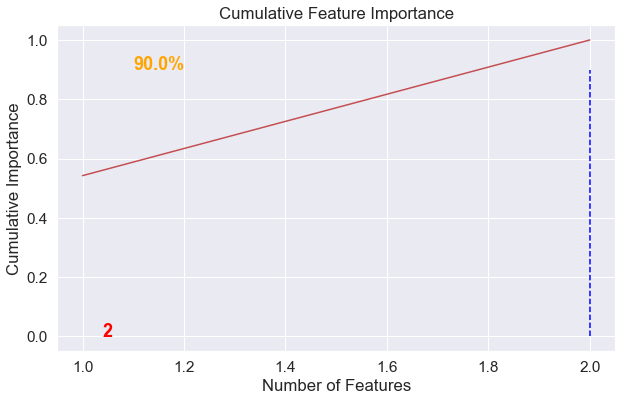

2 features required for 0.90 of cumulative importance


In [12]:
df_Chi2_feaimp = pd.DataFrame({'feature': feature_list_chi, 
                               'importance': feature_list_chi_score})\
                                .sort_values('importance', ascending = False)

df_Chi2_feaimp_norm = plot_feature_importances(df_Chi2_feaimp, threshold= 0.90, normalized=True)

> The Allergic_Reaction_Group and Naranjo_Category have p-value of Chi-Square Test less than 0.05 which mean we reject the null hypothesis and conclude that Allergic_Reaction_Group and Naranjo_Category is significantly associated with the Drug_Rechallenge_Result.

<a id="ch7"></a>
# 4. Data preparation and preprocessing
[Top](#ch0)

## Impute column which having few missing value

In [13]:
# Use statistical imputation technique
df.Underlying_Condition_A.fillna(df.Underlying_Condition_A.mode()[0], inplace=True)
df.Underlying_Condition_D.fillna(df.Underlying_Condition_D.mode()[0], inplace=True)
df.Underlying_Condition_E.fillna(df.Underlying_Condition_E.mode()[0], inplace=True)
df.Allergic_Reaction_Group.fillna(df.Allergic_Reaction_Group.mode()[0], inplace=True)

# Drop 1 row for null value in ELISpot_Result
df.dropna(subset=['ELISpot_Result'], inplace=True)

> Due to these features have only a few missing values, so we decide to tackle it with a statistical imputation technique by using fill the most frequency occurrence (mode) to a missing value. And for ELISpot_Result, we decide to drop it because it has missed only one row.

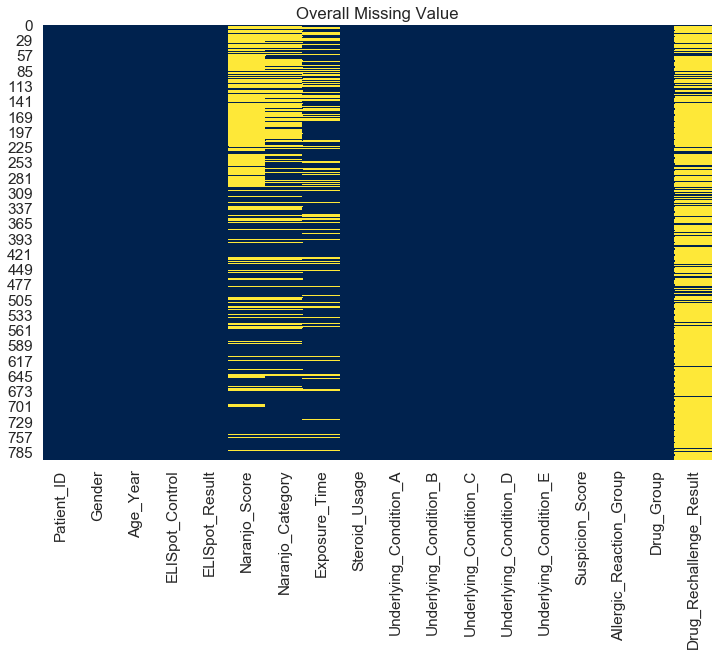

In [14]:
plt.figure(figsize=(12,8)); plt.title('Overall Missing Value')
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

## Explore  `Naranjo_Score` and `Naranjo_Category` 

In [15]:
labels = [str(i)+': ' + name for i,name in zip(range(4), ['Doubtful', 'Possible', 'Probable', 'Definite'])]
labels

['0: Doubtful', '1: Possible', '2: Probable', '3: Definite']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


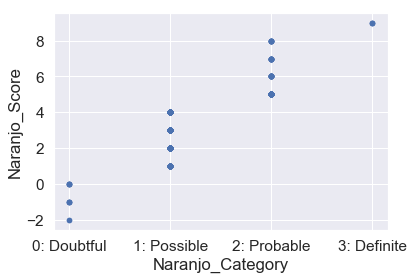

In [16]:
ax = df.plot(x='Naranjo_Category', y ='Naranjo_Score', kind='scatter')
ax.set_xticks(range(4));
ax.set_xticklabels(labels);

> According to above figure, Naranjo_Score and Naranjo_Category have high-correlation, which Naranjo Category is a grouping category of Naranjo Score. Hence, we can impute Naranjo_Category by using Naranjo_Score to Naranjo_Category and then remove Naranjo_Score.

In [17]:
df.iloc[493:494,:][['Naranjo_Score','Naranjo_Category']]

,Naranjo_Score,Naranjo_Category
494,3.000,1.000


In [18]:
# Impute Naranjo_Category by Naranjo_Score

def Categorize_Naranjo_Score(score):
    if score <= 0:
        return 0
    elif score in range(1,5):
        return 1
    elif score in range(5,9):
        return 2
    elif score in range(9,11):
        return 3
    else:
        return score


In [19]:
df.Naranjo_Category.fillna(value = df.Naranjo_Score.apply(Categorize_Naranjo_Score), inplace =True)
df.iloc[493:494,:][['Naranjo_Score','Naranjo_Category']]

,Naranjo_Score,Naranjo_Category
494,3.000,1.000


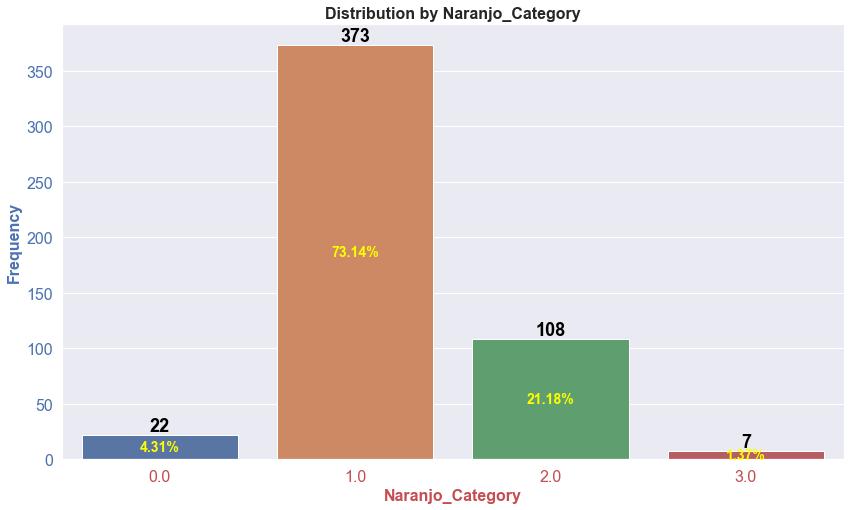

In [20]:
percent_countplot(df, col_name='Naranjo_Category',topn=0, dropna=True)

In [21]:
category_feature = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
print(category_feature)
category_feature.remove('Naranjo_Category')
print(category_feature)

['Gender', 'Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']
['Gender', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']


## Imputation to Naranjo_Category
- One Hot Encoding & Oversampling
- Compare between result performance from Logistic Classifier and Naive Bayes classifier then choose the best classifier to impute Naranjo_Category.
> We found that Logistic Classifier has better performance than Naive Bayes classifier. Therfore, we impute missing value by Logistic Classifier.

In [22]:
pvalue = 0.05
feature_list_chi, feature_list_chi_score = chi2_indtest(df[category_feature],df['Naranjo_Category'], pvalue = pvalue)
feature_list_chi

['Underlying_Condition_A',
 'Underlying_Condition_B',
 'Underlying_Condition_D',
 'Allergic_Reaction_Group',
 'Drug_Group']

> Using only associated feature to Naranjo_Category to build the classifier to impute the missing value which is 
 - 'Underlying_Condition_A',
 - 'Underlying_Condition_B',
 - 'Underlying_Condition_D',
 - 'Allergic_Reaction_Group',
 - 'Drug_Group' 

In [23]:
# Define feature
print('Original data: ', df.shape)
df_temp_Naranjo_Category = df[feature_list_chi + ['Naranjo_Category']].copy()
df_train = df_temp_Naranjo_Category.dropna(subset = ['Naranjo_Category'])

# Store unknown Naranjo_Category to df_unk
NaN_index = df_temp_Naranjo_Category[~df.index.isin(df_train.index)].index
df_unk = df_temp_Naranjo_Category.loc[NaN_index] # Select index that not in df_train


# Drop na row
df_train = df_temp_Naranjo_Category.dropna()
print('df_train dropna: ', df_train.shape)
print('Unknown Naranjo: ', df_unk.shape)

# Focus only Naranjo_Category class 1&2
df_train_w1_2 = df_train[df_train.Naranjo_Category.isin([1,2])]
print('Naranjo Cat1&2: ', df_train_w1_2.shape)

# Convert data type to category
df_train_cvt = cvt_type(df_train_w1_2, col_list=feature_list_chi)
X_data = df_train_cvt.drop('Naranjo_Category', axis= 1)
y_data = df_train_cvt[['Naranjo_Category']]

df_unk_cvt = cvt_type(df_unk, col_list=feature_list_chi)
X_unk_data = df_unk_cvt.drop('Naranjo_Category', axis= 1)

# Get dummies
X_encoded = pd.get_dummies(X_data, prefix_sep='_', drop_first=False)
X_unk_encoded = pd.get_dummies(X_unk_data, prefix_sep='_', drop_first=False)
print('Train encode: ', X_encoded.shape)
print('Class shape: ', y_data.shape)
print('Unknown encode: ', X_unk_encoded.shape)

Original data:  (798, 18)
df_train dropna:  (510, 6)
Unknown Naranjo:  (288, 6)
Naranjo Cat1&2:  (481, 6)
Train encode:  (481, 22)
Class shape:  (481, 1)
Unknown encode:  (288, 22)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
X_resampled, y_resampled = makeOverSamplesADASYN(X_encoded,y_data)
print(y_resampled['Naranjo_Category'].value_counts())

from sklearn.linear_model import LogisticRegression
LogReg_clf = LogisticRegression(random_state=7, fit_intercept=False)
LogReg_clf.fit(X_resampled, y_resampled)
print(accuracy_score(LogReg_clf.predict(X_resampled),y_resampled))
print(classification_report(LogReg_clf.predict(X_resampled),y_resampled))

Using TensorFlow backend.


2.000    383
1.000    373
Name: Naranjo_Category, dtype: int64
0.6415343915343915
              precision    recall  f1-score   support

         1.0       0.71      0.62      0.66       430
         2.0       0.57      0.67      0.62       326

    accuracy                           0.64       756
   macro avg       0.64      0.65      0.64       756
weighted avg       0.65      0.64      0.64       756



/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
df['Naranjo_Category'][NaN_index] = LogReg_clf.predict(X_unk_encoded)
df.Naranjo_Category.isnull().sum()

/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

> We will use only Naranjo_Category not Naranjo_Score. So, we can drop Naranjo_Score now

In [26]:
df.drop('Naranjo_Score', axis=1 ,inplace=True)

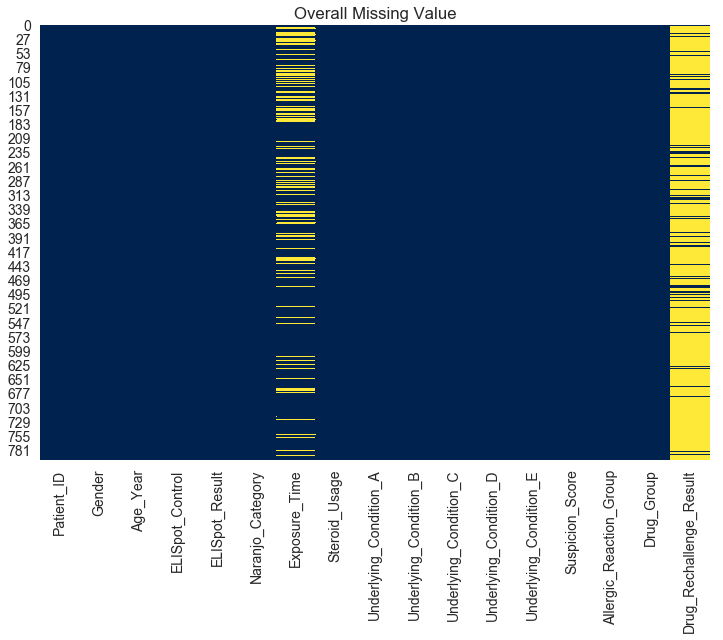

In [27]:
plt.figure(figsize=(12,8)); plt.title('Overall Missing Value')
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

## Explore `ELISpot_Control` and `ELISpot_Result`

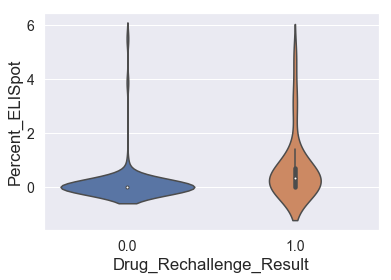

In [28]:
df_temp =df.copy()
df_temp['Percent_ELISpot'] = df_temp.ELISpot_Result / df_temp.ELISpot_Control *100

# remove outlier
df_temp = df_temp[df_temp['Percent_ELISpot']<10]

# Violinplot shows the kernel density estimation
# Bandwidth of the kernel shows the influence on the  resulting estimate
# fatter  bandwidth implies more males did not survive however fatter bandwidth for females shows that more females survied
sns.violinplot(x= "Drug_Rechallenge_Result", y ="Percent_ELISpot", data=df_temp)

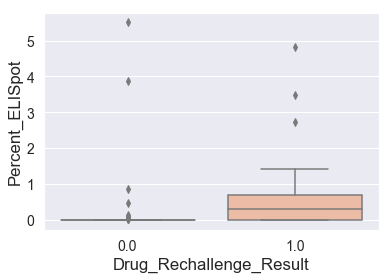

In [29]:
sns.boxplot(x="Drug_Rechallenge_Result", y="Percent_ELISpot",data=df_temp, palette="coolwarm")

In [30]:
from scipy import stats
data_0 = df_temp[df_temp.Drug_Rechallenge_Result == 0].Percent_ELISpot
data_1 = df_temp[df_temp.Drug_Rechallenge_Result == 1].Percent_ELISpot
stats.ttest_ind(data_0,data_1)

Ttest_indResult(statistic=-2.9312655665515877, pvalue=0.0040999268217664165)

> Let calculate new feature is Percent_ELISpot which is the proportion of ELISpot_Result and ELISpot_Control.
According to above figure, most patient with positive Drug_Rechallenge_Result has higher avearges of Percent_ELISpot than negative Drug_Rechallenge_Result significantly (p-value < 0.05) which mean we reject the null hypothesis of equal averages and conclude that the Percent_ELISpot of positive Drug_Rechallenge_Result has higher value than negative Drug_Rechallenge_Result.

## Explore `Exposure_Time`

In [31]:
Exposure_Time_corr = df.corr()[['Exposure_Time']]
Exposure_Time_corr[np.abs(Exposure_Time_corr.Exposure_Time) > 0.1]

,Exposure_Time
Exposure_Time,1.000
Underlying_Condition_D,0.123
Underlying_Condition_E,0.108


In [32]:
# Convert negative time to zero

ExT_neg_idx = df[df['Exposure_Time'] < 0][['Exposure_Time']].index

display(df.loc[ExT_neg_idx])

df.Exposure_Time = df.Exposure_Time.apply(lambda x: max(0,x))
df.loc[ExT_neg_idx]

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
202,319,1,56,1664,0.000,1.000,-9.000,1,0.000,1,0,0.000,1.000,2,1.000,8,nan
275,352,0,13,2060,0.000,0.000,-3.000,0,0.000,0,0,0.000,0.000,2,1.000,1,nan


,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result
202,319,1,56,1664,0.000,1.000,0.000,1,0.000,1,0,0.000,1.000,2,1.000,8,nan
275,352,0,13,2060,0.000,0.000,0.000,0,0.000,0,0,0.000,0.000,2,1.000,1,nan


In [33]:
target = ['Drug_Rechallenge_Result']

selected_feature = df.columns.tolist()
selected_feature.remove('Patient_ID')
# selected_feature.remove('Percent_ELISpot')
selected_feature.remove('Drug_Rechallenge_Result')
print(selected_feature)

['Gender', 'Age_Year', 'ELISpot_Control', 'ELISpot_Result', 'Naranjo_Category', 'Exposure_Time', 'Steroid_Usage', 'Underlying_Condition_A', 'Underlying_Condition_B', 'Underlying_Condition_C', 'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score', 'Allergic_Reaction_Group', 'Drug_Group']


In [34]:
df_Exposure_Time = df[selected_feature].copy()
df_Exposure_Time.head()

,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group
0,1,26,2504,0.000,1.000,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2
1,0,75,1868,51.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4
2,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1
3,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3
4,1,60,3136,0.000,2.000,0.000,0,0.000,0,0,1.000,1.000,3,8.000,1


In [35]:
df_Exposure_Time = df[selected_feature].copy()
df_ExT_train = df_Exposure_Time.dropna(subset = ['Exposure_Time'])
df_ExT_unk = df_Exposure_Time.iloc[~df.index.isin(df_ExT_train.index)] # Select index that not in df_train
print(df.shape)
print(df_ExT_train.shape)

# Drop na row
df_ExT_train = df_Exposure_Time.dropna()
print(df_ExT_train.shape)
print(df_ExT_unk.shape)

(798, 17)
(798, 15)
(798, 15)
(0, 15)


In [36]:
cat_col = ['Gender','Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A',
       'Underlying_Condition_B', 'Underlying_Condition_C',
       'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score',
       'Allergic_Reaction_Group', 'Drug_Group']

df_train_cvt = cvt_type(df_ExT_train, col_list=cat_col)
X_ExT = df_train_cvt.drop('Exposure_Time',axis=1)
y_ExT = df_train_cvt[['Exposure_Time']]

# Get dummies
X_ExT_encoded = pd.get_dummies(X_ExT, prefix_sep='_', drop_first=False)
print(X_ExT_encoded.shape)

(798, 40)


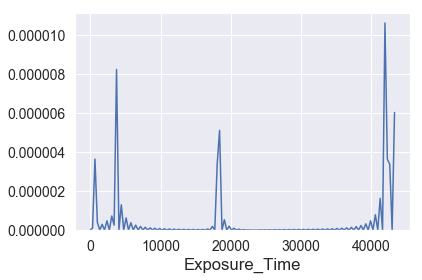

In [37]:
# understanding the data age distribution
sns.distplot(df_ExT_train["Exposure_Time"], bins=np.linspace(0,max(df["Exposure_Time"]),1))

## Regression imputation to Exposure_Time

In [38]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept = False)
lm.fit(X_ExT_encoded, y_ExT)

from sklearn import metrics
predictions = lm.predict(X_ExT_encoded)
y_test = y_ExT

print('MAE :'," ", metrics.mean_absolute_error(y_test,predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,predictions))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2 :'," ", metrics.r2_score(y_test,predictions))

MAE :   978.2083557385607
MSE :   10911643.984211002
RMSE :   3303.277763708496
R2 :   0.09118092740092809


#### Bad result from LinearRegression model
- Try to discretize Exposure_Time and impute value with classifier instead
- Discretize to 4 categories
    - < 1hr (60 min)
    - 1 - 6 hrs (60 - 360 mins)
    - 6 - 24 hrs (360 - 1440 mins)
    - \> 24 hrs (1440 mins)

In [39]:
def discretize_time(time):
    if time < 60:
        return 0 #'less_1hr'
    elif 60 <= time < 360:
        return 1 #'1_6hrs'
    elif 360 <= time < 1440:
        return 2 #'6_24hrs'
    elif time >= 1440:
        return 3 #'over_24hrs'
    else:
        return time

In [40]:
df['Ex_Time_group'] = df.Exposure_Time.apply(discretize_time)
df.head()

,Patient_ID,Gender,Age_Year,ELISpot_Control,ELISpot_Result,Naranjo_Category,Exposure_Time,Steroid_Usage,Underlying_Condition_A,Underlying_Condition_B,Underlying_Condition_C,Underlying_Condition_D,Underlying_Condition_E,Suspicion_Score,Allergic_Reaction_Group,Drug_Group,Drug_Rechallenge_Result,Ex_Time_group
0,2,1,26,2504,0.000,1.000,31.000,1,0.000,0,0,0.000,0.000,2,2.000,2,nan,0
1,7,0,75,1868,51.000,2.000,1.000,0,0.000,0,0,0.000,0.000,2,6.000,4,1.000,0
2,13,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,1,nan,0
3,13,0,81,1617,10.000,2.000,19.000,1,1.000,0,0,1.000,1.000,2,5.000,3,nan,0
4,18,1,60,3136,0.000,2.000,0.000,0,0.000,0,0,1.000,1.000,3,8.000,1,nan,0


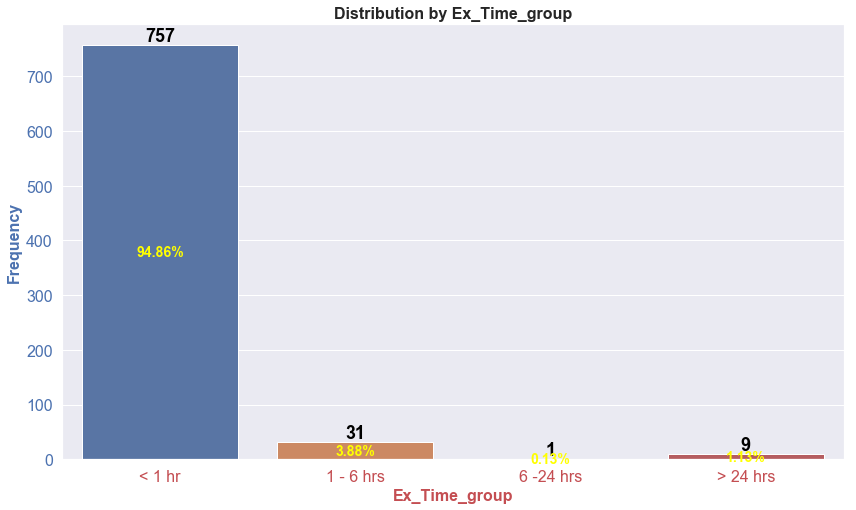

In [41]:
# Exposure_Time in hour unit
ax = percent_countplot(df[["Ex_Time_group"]], col_name='Ex_Time_group', topn=0)

labels = ['< 1 hr', '1 - 6 hrs', '6 -24 hrs', '> 24 hrs']
# https://stackoverflow.com/questions/45056579/is-it-possible-to-format-the-labels-using-set-xticklabels-in-matplotlib
ax.set_xticklabels(labels);

> Due to linear regression for predict Exposure_Time has low R-square (less than 0.10). I decide to drop Exposure_Time and use statistical imputation technique for Ex_Time_group instead.

## Imputation to Ex_Time_group

In [42]:
df.Ex_Time_group.fillna(df.Ex_Time_group.mode()[0], inplace=True)

> We will use Ex_Time_group instead of Exposure_Time. So, we can drop Exposure_Time now

In [43]:
df.drop('Exposure_Time', axis=1 ,inplace=True)

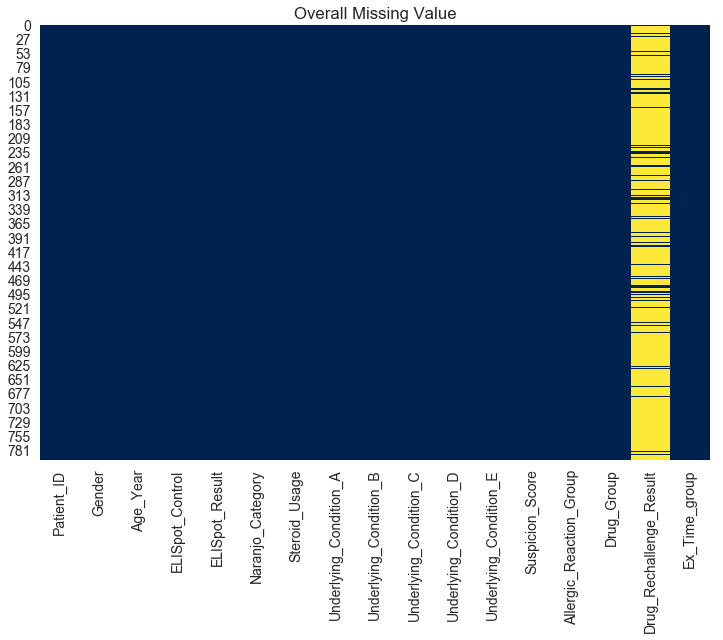

In [44]:
plt.figure(figsize=(12,8)); plt.title('Overall Missing Value')
sns.heatmap(df.isnull(), cbar=False, cmap = 'cividis');

<a id="ch8"></a>
# 5. Developing model, Fine-tuning hyperparameters and Pseudo-labeling
[Top](#ch0)

## One Hot Encoding

In [45]:
cat_col = ['Gender', 'Naranjo_Category', 'Steroid_Usage', 'Underlying_Condition_A',
       'Underlying_Condition_B', 'Underlying_Condition_C',
       'Underlying_Condition_D', 'Underlying_Condition_E', 'Suspicion_Score',
       'Allergic_Reaction_Group', 'Drug_Group','Ex_Time_group']

df_cat = cvt_type(df, col_list=cat_col)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 0 to 798
Data columns (total 17 columns):
Patient_ID                 798 non-null int64
Gender                     798 non-null category
Age_Year                   798 non-null int64
ELISpot_Control            798 non-null int64
ELISpot_Result             798 non-null float64
Naranjo_Category           798 non-null category
Steroid_Usage              798 non-null category
Underlying_Condition_A     798 non-null category
Underlying_Condition_B     798 non-null category
Underlying_Condition_C     798 non-null category
Underlying_Condition_D     798 non-null category
Underlying_Condition_E     798 non-null category
Suspicion_Score            798 non-null category
Allergic_Reaction_Group    798 non-null category
Drug_Group                 798 non-null category
Drug_Rechallenge_Result    114 non-null float64
Ex_Time_group              798 non-null category
dtypes: category(12), float64(2), int64(3)
memory usage: 88.6 KB


In [46]:
print('Unique value')
for col in cat_col:
    print('{0:25}: {1:}'.format(col, df[col].unique().ravel()))

Unique value
Gender                   : [1 0]
Naranjo_Category         : [1 2 0 3]
Steroid_Usage            : [1 0]
Underlying_Condition_A   : [0 1]
Underlying_Condition_B   : [0 1]
Underlying_Condition_C   : [0 1]
Underlying_Condition_D   : [0 1]
Underlying_Condition_E   : [0 1]
Suspicion_Score          : [2 3 1]
Allergic_Reaction_Group  : [2 6 5 8 1 3 7 4]
Drug_Group               : [2 4 1 3 6 7 5 8]
Ex_Time_group            : [0 1 3 2]


In [47]:
# Get dummies
df_encoded = pd.get_dummies(df_cat, prefix_sep='_', drop_first=False)
print(df_encoded.shape)
df_encoded.head()

(798, 46)


,Patient_ID,Age_Year,ELISpot_Control,ELISpot_Result,Drug_Rechallenge_Result,Gender_0,Gender_1,Naranjo_Category_0,Naranjo_Category_1,Naranjo_Category_2,Naranjo_Category_3,Steroid_Usage_0,Steroid_Usage_1,Underlying_Condition_A_0,Underlying_Condition_A_1,Underlying_Condition_B_0,Underlying_Condition_B_1,Underlying_Condition_C_0,Underlying_Condition_C_1,Underlying_Condition_D_0,Underlying_Condition_D_1,Underlying_Condition_E_0,Underlying_Condition_E_1,Suspicion_Score_1,Suspicion_Score_2,Suspicion_Score_3,Allergic_Reaction_Group_1,Allergic_Reaction_Group_2,Allergic_Reaction_Group_3,Allergic_Reaction_Group_4,Allergic_Reaction_Group_5,Allergic_Reaction_Group_6,Allergic_Reaction_Group_7,Allergic_Reaction_Group_8,Drug_Group_1,Drug_Group_2,Drug_Group_3,Drug_Group_4,Drug_Group_5,Drug_Group_6,Drug_Group_7,Drug_Group_8,Ex_Time_group_0,Ex_Time_group_1,Ex_Time_group_2,Ex_Time_group_3
0,2,26,2504,0.000,nan,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,7,75,1868,51.000,1.000,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,13,81,1617,10.000,nan,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,13,81,1617,10.000,nan,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,18,60,3136,0.000,nan,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0


## Split data to train and test set

In [48]:
df_data = df_encoded.dropna()
NaN_idx = ~df_encoded.index.isin(df_data.index) # Store [True, False] array
# NaN_index = df_encoded[~df_encoded.index.isin(df_data.index)].index # Store index
df_NaN = df_encoded[NaN_idx] 
df_NaN.shape

(684, 46)

In [49]:
# Split data to test set
df_test_pos = df_data[df_data.Drug_Rechallenge_Result == 1].sample(10,random_state=7)
df_test_neg = df_data[df_data.Drug_Rechallenge_Result == 0].sample(10,random_state=7)
df_test = pd.concat([df_test_pos,df_test_neg])
df_test_idx = df_test_pos.index.tolist() + df_test_neg.index.tolist()
print(df_test.shape)
df_test.Drug_Rechallenge_Result.value_counts()

(20, 46)


0.000    10
1.000    10
Name: Drug_Rechallenge_Result, dtype: int64

In [50]:
# Split data to train set
df_train = df_data[~df_data.index.isin(df_test_idx)]
print(df_train.shape)
df_train.Drug_Rechallenge_Result.value_counts()

(94, 46)


0.000    76
1.000    18
Name: Drug_Rechallenge_Result, dtype: int64

In [51]:
# Training set
X_encoded = df_train.drop(['Drug_Rechallenge_Result','Patient_ID'], axis=1)
y_data = df_train[['Drug_Rechallenge_Result']]

# Test set 
X_encoded_test = df_test.drop(['Drug_Rechallenge_Result','Patient_ID'], axis=1)
y_data_test = df_test[['Drug_Rechallenge_Result']]

## Develop and fine-tune model
- Logistic regression
- Naive Baye 

In [52]:
score_param = 'accuracy' # Score for tune model
n_iter_search = 50 # Max candidate parameter for RandomizedSearchCV
cv = 5 # Number of k-fold cross validation

In [64]:
# Logistic regression
LogReg_rs, LogReg_gs = LogReg_HPTune_w_OverSam(X_encoded,y_data.values.ravel())

print(LogReg_gs.best_score_)
print(LogReg_gs.best_score_)
print(LogReg_gs.best_params_)
print(LogReg_gs.best_params_)

print('='*25)
print('Training set performance\n', y_data.Drug_Rechallenge_Result.value_counts())
print('='*25)
print(classification_report(LogReg_gs.predict(X_encoded),y_data))

print('='*25)
print('Test set performance\n', y_data_test.Drug_Rechallenge_Result.value_counts())
print('='*25)
print(classification_report(LogReg_gs.predict(X_encoded_test),y_data_test))

print(f"Average Accuracy: \t {LogReg_gs.best_score_:.4f}")
print(f"Accuracy SD: \t\t {LogReg_gs.cv_results_['std_test_score'][LogReg_gs.best_index_]:.4f}")
LogReg_gs.best_estimator_

/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.8609271523178808
0.8609271523178808
{'C': 2.442053094548651}
{'C': 2.442053094548651}
Training set performance
 0.000    76
1.000    18
Name: Drug_Rechallenge_Result, dtype: int64
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92        81
         1.0       0.50      0.69      0.58        13

    accuracy                           0.86        94
   macro avg       0.72      0.79      0.75        94
weighted avg       0.89      0.86      0.87        94

Test set performance
 0.000    10
1.000    10
Name: Drug_Rechallenge_Result, dtype: int64
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20

Average Accuracy: 	 0.8609
Accuracy SD: 		 0.0889


LogisticRegression(C=2.442053094548651, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# Naive Bayes
NB_rs, NB_gs = NB_HPTune_w_OverSam(X_encoded,y_data.values.ravel())

print(NB_gs.best_score_)
print(NB_gs.best_score_)
print(NB_gs.best_params_)
print(NB_gs.best_params_)

print('='*25)
print('Training set performance\n', y_data.Drug_Rechallenge_Result.value_counts())
print('='*25)
print(classification_report(NB_gs.predict(X_encoded),y_data))

print('='*25)
print('Test set performance\n', y_data_test.Drug_Rechallenge_Result.value_counts())
print('='*25)
print(classification_report(NB_gs.predict(X_encoded_test),y_data_test))

print(f"Average Accuracy: \t {NB_gs.best_score_:.4f}")
print(f"Accuracy SD: \t\t {NB_gs.cv_results_['std_test_score'][NB_gs.best_index_]:.4f}")
NB_gs.best_estimator_

0.8211920529801324
0.8211920529801324
{'var_smoothing': 3.615414850916614e-07}
{'var_smoothing': 3.615414850916614e-07}
Training set performance
 0.000    76
1.000    18
Name: Drug_Rechallenge_Result, dtype: int64
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84        70
         1.0       0.50      0.38      0.43        24

    accuracy                           0.74        94
   macro avg       0.65      0.62      0.63        94
weighted avg       0.73      0.74      0.73        94

Test set performance
 0.000    10
1.000    10
Name: Drug_Rechallenge_Result, dtype: int64
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        13
         1.0       0.70      1.00      0.82         7

    accuracy                           0.85        20
   macro avg       0.85      0.88      0.85        20
weighted avg       0.89      0.85      0.85        20

Average Accuracy: 	 0.8212
Accuracy SD: 		

GaussianNB(priors=None, var_smoothing=3.615414850916614e-07)

> Although Naive Baye has higher accuracy than Logistic regression in the test set, however, it seems to overfit due to high standard deviation. Therefore, We decide to choose Logistic regression to be the base model for Pseudo-labeling.

## Pseudo-labeling

In [66]:
# Logistic regression
start = time()

X_encoded_new, y_data_new, LogReg_gs_final = Pseudo_labeling(df_train, df_NaN, LogReg_HPTune_w_OverSam, n_sam = 0.5)

t = time() - start
print('Execution time = ', t, ' seconds')

Initiate base model from training set....
(94, 44)
(94, 1)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Start Pseudo-labeling Process
Round:  1 
Processing....
(124, 44)
(124, 1)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbf

Training score:  0.8962264150943396
Test score:  0.7
Round:  2 
Processing....
(169, 44)
(169, 1)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training score:  0.9178571428571428
Test score:  0.7
Round:  3 
Processing....
(222, 44)
(222, 1)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Training score:  0.9536784741144414
Test score:  0.7
Round:  4 
Processing....
(300, 44)
(300, 1)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbf

Training score:  0.9715447154471545
Test score:  0.7
Round:  5 
Processing....
(401, 44)
(401, 1)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbf

Training score:  0.9835796387520526
Test score:  0.7
Round:  6 
Processing....
(539, 44)
(539, 1)


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=50. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training score:  0.986335403726708
Test score:  0.7
=========== Finish ===========
(778, 44)
(778, 1)
Execution time =  248.56687903404236  seconds


/Users/PLoTAir/opt/anaconda3/envs/DS_project/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Final result 

In [67]:
# Concat X_encoded_new and y_data_new 
df_final = pd.concat([X_encoded_new, y_data_new],axis=1).sort_index()
df_final_train = pd.concat([df['Patient_ID'],df_final],axis=1).dropna()
df_final_train.head()

,Patient_ID,Age_Year,ELISpot_Control,ELISpot_Result,Gender_0,Gender_1,Naranjo_Category_0,Naranjo_Category_1,Naranjo_Category_2,Naranjo_Category_3,Steroid_Usage_0,Steroid_Usage_1,Underlying_Condition_A_0,Underlying_Condition_A_1,Underlying_Condition_B_0,Underlying_Condition_B_1,Underlying_Condition_C_0,Underlying_Condition_C_1,Underlying_Condition_D_0,Underlying_Condition_D_1,Underlying_Condition_E_0,Underlying_Condition_E_1,Suspicion_Score_1,Suspicion_Score_2,Suspicion_Score_3,Allergic_Reaction_Group_1,Allergic_Reaction_Group_2,Allergic_Reaction_Group_3,Allergic_Reaction_Group_4,Allergic_Reaction_Group_5,Allergic_Reaction_Group_6,Allergic_Reaction_Group_7,Allergic_Reaction_Group_8,Drug_Group_1,Drug_Group_2,Drug_Group_3,Drug_Group_4,Drug_Group_5,Drug_Group_6,Drug_Group_7,Drug_Group_8,Ex_Time_group_0,Ex_Time_group_1,Ex_Time_group_2,Ex_Time_group_3,Drug_Rechallenge_Result
0,2,26.000,2504.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
1,7,75.000,1868.000,51.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
2,13,81.000,1617.000,10.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
3,13,81.000,1617.000,10.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
4,18,60.000,3136.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000


In [68]:
# save the model to disk
filename = './Model/LogReg_gs_Pseudo_labeling.pkl'
pickle.dump(LogReg_gs_final, open(filename, 'wb'))

df_final_train.to_csv('./Model/df_final_train.csv', index=False)

In [69]:
# Load the model to disk
filename = './Model/LogReg_gs_Pseudo_labeling.pkl'
LogReg_gs_final = pickle.load(open(filename,"rb"))

df_final_train = pd.read_csv('./Model/df_final_train.csv')

In [70]:
X_encoded_new = df_final_train.drop(['Patient_ID', 'Drug_Rechallenge_Result'], axis =1)
y_data_new = df_final_train[['Drug_Rechallenge_Result']]

<a id="ch9"></a>
# 6. Evaluate Model Performance
[Top](#ch0)
- Accuracy
- Balanced_Accuracy
- AUC
- Confusion Matrix
- Recall(Sensitivity)
- Precision
- Specifivity
- Average_Precision
- F1_score

In [74]:
print(LogReg_gs_final.best_score_)
print(LogReg_gs_final.best_score_)
print(LogReg_gs_final.best_params_)
print(LogReg_gs_final.best_params_)

print('='*25)
print('Training set performance\n', y_data_new.Drug_Rechallenge_Result.value_counts())
print('='*25)
print(classification_report(LogReg_gs_final.predict(X_encoded_new),y_data_new))

print('='*25)
print('Test set performance\n', y_data_test.Drug_Rechallenge_Result.value_counts())
print('='*25)
print(classification_report(LogReg_gs_final.predict(X_encoded_test),y_data_test))

print(f"Average Accuracy: \t {LogReg_gs_final.best_score_:.4f}")
print(f"Accuracy SD: \t\t {LogReg_gs_final.cv_results_['std_test_score'][LogReg_gs.best_index_]:.4f}")

LogReg_gs_final.best_estimator_

0.9875776397515528
0.9875776397515528
{'C': 16.768329368110074}
{'C': 16.768329368110074}
Training set performance
 0.000    518
1.000    260
Name: Drug_Rechallenge_Result, dtype: int64
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       524
         1.0       0.97      1.00      0.98       254

    accuracy                           0.99       778
   macro avg       0.99      0.99      0.99       778
weighted avg       0.99      0.99      0.99       778

Test set performance
 0.000    10
1.000    10
Name: Drug_Rechallenge_Result, dtype: int64
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.70      0.70      0.70        10

    accuracy                           0.70        20
   macro avg       0.70      0.70      0.70        20
weighted avg       0.70      0.70      0.70        20

Average Accuracy: 	 0.9876
Accuracy SD: 		 0.0273


LogisticRegression(C=16.768329368110074, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model summary

In [72]:
model_List = ['Training set','Test set']
model_func = [LogReg_gs_final, LogReg_gs_final]
best_param_list = [LogReg_gs_final, LogReg_gs_final]
Feature_data = [X_encoded_new, X_encoded_test]
Target_data = [y_data_new, y_data_test]
model_report(Feature_data, Target_data, model_List, model_func, best_param_clf = best_param_list)

,LogReg_Model,Accuracy,Balanced_Accuracy,AUC,Confusion_Matrix,Confusion_Matrix_Normalized,Recall,Precision,Precision_neg,Specificity,Average_Precision,F1_score,Best_Parameters
0,Training set,0.990,0.990,1.000,"{'TP': 253, 'FP': 1, 'FN': 7, 'TN': 517}","{'TP': '0.33', 'FP': '0.00', 'FN': '0.01', 'TN': '0.66'}",0.970,1.000,0.990,1.000,0.990,0.980,{'C': 16.768329368110074}
1,Test set,0.700,0.700,0.590,"{'TP': 7, 'FP': 3, 'FN': 3, 'TN': 7}","{'TP': '0.35', 'FP': '0.15', 'FN': '0.15', 'TN': '0.35'}",0.700,0.700,0.700,0.700,0.610,0.700,{'C': 16.768329368110074}


<a id="ch10"></a>
# Result
[Top](#ch0)

<p style="text-indent: 2.5em;">
    According to model summary on testing data, the ExtraTC_gs get the performance with Average precision and AUC is 30% and 71% respectively. LGBM_clf_gs get the performance with Average precision and AUC is 33% and 71% respectively. LogReg_clf_gs get the performance with Average precision and AUC is 32% and 70% respectively. The average accuracy and standard deviation in ExtraTC_gs, LGBM_clf_gs, LogReg_clf_gs is (65.00%,0.0019) (64.65%,0.0017) (64.52%,0.0025) respectively.

<p style="text-indent: 2.5em;">
    The most top 20 importance feature of chi2, Extra Trees Classifier, Light GBM Classifier, and Logitic Regression Classifier are as table below.

### Coefficient rank

In [73]:
coef_dict = {}
coef_dict['intercept'] = LogReg_gs_final.best_estimator_.intercept_.ravel()[0]
for coef, feat in zip(LogReg_gs_final.best_estimator_.coef_.ravel(),X_encoded_new.columns):
    coef_dict[feat] = coef
display(sorted(coef_dict.items(), key= lambda kv:kv[1], reverse=True)[:15])

[('Suspicion_Score_2', 6.847875509119067),
 ('Drug_Group_2', 2.902104836335738),
 ('Ex_Time_group_0', 2.5667883692968676),
 ('Allergic_Reaction_Group_2', 2.550147601894827),
 ('Allergic_Reaction_Group_5', 2.541746124388258),
 ('Drug_Group_5', 1.4436977465612477),
 ('Underlying_Condition_A_1', 0.9503026508812268),
 ('Naranjo_Category_2', 0.8772092894911446),
 ('Allergic_Reaction_Group_4', 0.48948901248383875),
 ('Allergic_Reaction_Group_8', 0.4728632752284823),
 ('Drug_Group_4', 0.4536478815069558),
 ('Naranjo_Category_3', 0.2594754007767484),
 ('Underlying_Condition_B_0', 0.13496993642999955),
 ('ELISpot_Result', 0.04965579453736806),
 ('Age_Year', 0.008357656146612907)]

<a id="ch11"></a>
# Analysis of Classification Error
[Top](#ch0)

<p style="text-indent: 2.5em;">
    Due to limitation of time, then we did not perform for this task. However, in term of prediction error, as a result, the standard deviation of average accuracy in the logistic classifier is rather low. It means that the model has low variance and not has any overfitting issue. However, bias notwithstanding, value is rather high despite the low average accuracy in test set. It means that the model is underfitting; thus, we have a room for improving the performance which we mention in future direction section.

<a id="ch12"></a>
# Conclusions, Limitations, and Discussion
[Top](#ch0)

## Conclusions
<p style="text-indent: 2.5em;">
    This study is a classification problem that focuses on the drug rechallenge result which all doctors want to avoid prescribing drugs that maybe allergic to the patients. Enzyme-linked immunospot (ELISpot) is a laboratory technique that tests whether the patient's immune cells will respond to particular drugs. This allows doctor to screen whether a drug is likely to be safe for the patient. However, as with any test, ELISpot is not perfect. Drugs that the patient is allergic to sometimes do not elicit any response in ELISpot test (False Negative) and vice versa. Due to point of concern is false negative which doctor try to avoid prescribing drugs that maybe allergic to the patients. Hence, the model evaluation should be based on positive class rather than negative class. The possible metrics to evaluate this model should mainly base on sensitivity. As the result from the model evaluation after developing the model, we found that logistic regression get the decent performance with sensitivity and specificity is 70% and 70% respectively.

<p style="text-indent: 2.5em;">
    According to coefficient rank , we found that Suspicion_Score_2 is the most important feature following by Drug_Group_2, Ex_Time_group_0, Allergic_Reaction_Group_2, Allergic_Reaction_Group_5, Drug_Group_5, and etc. respectively.
    
## Limitations
<p style="text-indent: 2.5em;">
    The limitation of this study is the data which is very highly missing value as well as the limitation of time and resource which can perform just a few classifier, few technique, and few candidate for develop and fine-tuning hyperparameter. These lead to the model performance is not as good as it could be and we might miss the better performance from the other classifier.



## Discussion

### Undersampling/Oversampling

![title](img/ImbalancedClasses_fig5.jpg)

[source](https://towardsdatascience.com/breaking-the-curse-of-small-datasets-in-machine-learning-part-1-36f28b0c044d)

- In this experiment, the data has imbalanced classes issue, which can affect the model performance if we do not handle this issue before we develop the model. However, we should not interrupt the testing data distribution. On the other hand, we should do undersampling/oversampling on only the training data. By undersampling/oversampling only on the training data, none of the information in the validation data is being used to create synthetic observations. So these results should be generalizable.
- For this dataset we will perform overampling(uppersampling) because we have small dataset.

### Evaluation

![title](img/Modified-Confusion-Matrix-Table-for-Accuracy-Prediction-of-24.ppm.png)
![title](img/Accuracy_fig.png)

- When making a prediction for a two-class classification problem, the following types of errors can be made by a classifier:
    - False Positive (FP): predict an event when there was no event.
    - False Negative (FN): predict no event when in fact there was an event.
    - True Positive (TP): predict an event when there was an event.
    - True Negative (TN): predict no event when in fact there was no event.
   

- **Accuracy:** Accuracy tell us about the overall performance of the model.

- **Recall:** Recall gives us an idea about when it’s actually yes, how often does it predict yes.

- **Precision:** Precision tells us about when it predicts yes, how often is it correct.

- **ROC Curves:** summarise the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

- **Precision-Recall curves:** summarise the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

*Note that in computing precision and recall there is never use of the true negatives, these measures only consider correct predictions*

- With imbalanced classes, it’s easy to get a high accuracy without actually making useful predictions. So, accuracy as an evaluation metrics makes sense only if the class labels are uniformly distributed as well as ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets. In both cases, the area under the curve (AUC) can be used as a summary of the model performance.

- As shown before when one has imbalanced classes, precision and recall are better metrics than accuracy, in the same way, for imbalanced datasets a Precision-Recall curve is more suitable than a ROC curve.

- However, for this Drug Allergy Prediction dataset, we tackle these issues by balancing the data in the test set. Therefore, we can use any metric to evaluate this ML experiment depend on the objective of the problem or point of concern from the result. For example, if false negative is point of concern from user, we should focus on  Recall(Sensitivity). On the other hand if false positive is point of concern from user, we should focus on  Specificity instead.
 

## Prediction Error

**Bias** is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

**Variance** is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

<div><center>$Err(x_{i})=Bias^{2}+Variance+Irreducible Error$</cernter></div>

![](./img/biasvariance.png)

There is no escaping the relationship between bias and variance in machine learning.

- Increasing the bias will decrease the variance.
- Increasing the variance will decrease the bias.

There is a trade-off at play between these two concerns and the algorithms you choose and the way you choose to configure them are finding different balances in this trade-off for your problem.

![](img/mNIed.png)

## Pseudo-labeling

![](img/pseudo-labeling.png)
[source](https://datawhatnow.com/pseudo-labeling-semi-supervised-learning/)

<a id="ch13"></a>
# Future Direction
[Top](#ch0)
- Feature engineering by perform standardize scaling,  dimension reduction(PCA), and using polyfeature to see the interaction between variable.
- Add extra column with `An Extension To Imputation` [Ref](https://www.kaggle.com/alexisbcook/missing-values). Due to the rows with missing values may be unique in some other way. In that case, our model would make better predictions by considering which values were originally missing.
- Splitting data by patient to make sure that a patient data only occur in one of the sets. This can prevent model memorizes the information of same patient or data leakage which refers to a mistake make by the creator of a machine learning model in which they accidentally share information between the test and training data-sets.  
- Try more variety of classifiers to compare the performance.

<a id="ch90"></a>
# Reference
[Top](#ch0)
1. Univariate selection : Chi-Square Test
    - https://pythonfordatascience.org/chi-square-test-of-independence-python/
    - http://www.insightsbot.com/blog/2AeuRL/chi-square-feature-selection-in-python
- Feature Importance 
    - https://github.com/WillKoehrsen/Machine-Learning-Projects
- Prediction Error
    - https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229
- Géron A. Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc."; 2017 Mar 13.
- Pseudo-labeling
    - https://datawhatnow.com/pseudo-labeling-semi-supervised-learning/
    - https://mc.ai/pseudo-labeling/
    - https://www.analyticsvidhya.com/blog/2017/09/pseudo-labelling-semi-supervised-learning-technique/